# Questions

## Question 1:
### What is the relationship between a player's rating and potential, and is there a siginifant difference between the two between younger and older players?

## Question 2:
### What is the rating distribution and variance among positions?

## Question 3:
### What is the age distribution and variance among positions?

## Question 4:
### Do certain positions peak in rating at older ages compared to other positions?

## Question 5:
### How does the distribution of rating between nationalities differ from that of the distribution of potential of wonderkids (players with high potential at a younger age) between nationalities?

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import math
from scipy.stats import mannwhitneyu

## Data Cleaning/Wrangling and Exploratory Data Analysis

In [43]:
fifa = pd.read_csv('FIFA-21 Complete.csv', delimiter=';')
fifa

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid
...,...,...,...,...,...,...,...,...,...
17976,256093,Jaime Ortíz,Ecuador,ST,56,21,0,64,Sociedad Deportiva Aucas
17977,256088,Michael Carcelén,Ecuador,CM,56,23,0,64,Club Deportivo El Nacional
17978,256074,Davide Luzi,Venezuela,ST,56,18,1,68,Zamora Fútbol Club
17979,256073,Sergio Sulbarán,Venezuela,RW,56,22,0,62,Zamora Fútbol Club


In [44]:
fifa.drop(columns=['player_id', 'hits'], inplace=True)
fifa

,name,nationality,position,overall,age,potential,team
0,Lionel Messi,Argentina,ST|CF|RW,94,33,94,FC Barcelona
1,Cristiano Ronaldo,Portugal,ST|LW,93,35,93,Juventus
2,Neymar Jr,Brazil,CAM|LW,92,28,92,Paris Saint-Germain
3,Virgil van Dijk,Netherlands,CB,91,29,92,Liverpool
4,Jan Oblak,Slovenia,GK,91,27,93,Atlético Madrid
...,...,...,...,...,...,...,...
17976,Jaime Ortíz,Ecuador,ST,56,21,64,Sociedad Deportiva Aucas
17977,Michael Carcelén,Ecuador,CM,56,23,64,Club Deportivo El Nacional
17978,Davide Luzi,Venezuela,ST,56,18,68,Zamora Fútbol Club
17979,Sergio Sulbarán,Venezuela,RW,56,22,62,Zamora Fútbol Club


In [45]:
fifa.rename(columns={'overall':'rating'}, inplace=True)
fifa

,name,nationality,position,rating,age,potential,team
0,Lionel Messi,Argentina,ST|CF|RW,94,33,94,FC Barcelona
1,Cristiano Ronaldo,Portugal,ST|LW,93,35,93,Juventus
2,Neymar Jr,Brazil,CAM|LW,92,28,92,Paris Saint-Germain
3,Virgil van Dijk,Netherlands,CB,91,29,92,Liverpool
4,Jan Oblak,Slovenia,GK,91,27,93,Atlético Madrid
...,...,...,...,...,...,...,...
17976,Jaime Ortíz,Ecuador,ST,56,21,64,Sociedad Deportiva Aucas
17977,Michael Carcelén,Ecuador,CM,56,23,64,Club Deportivo El Nacional
17978,Davide Luzi,Venezuela,ST,56,18,68,Zamora Fútbol Club
17979,Sergio Sulbarán,Venezuela,RW,56,22,62,Zamora Fútbol Club


In [46]:
fifa['position'].unique()

array(['ST|CF|RW', 'ST|LW', 'CAM|LW', 'CB', 'GK', 'CM|CAM', 'ST', 'ST|RW',
       'LW', 'ST|RW|LW', 'CDM|CM', 'ST|CF|LW', 'CM', 'RW|LW', 'CF', 'CDM',
       'ST|LM', 'ST|CF', 'CM|CAM|RW', 'RB|CDM|CM', 'CAM|CF', 'LM|CF',
       'RM|CM|CAM', 'RM|LM|CAM', 'LB', 'CAM|RW', 'CB|CDM', 'RM|RW',
       'LM|CF|LW', 'RM|LM|CM', 'ST|CAM|CF', 'RB', 'CDM|CM|CAM',
       'ST|RM|CAM', 'LB|LM|CM', 'RM|LM|RW', 'CM|CAM|CF', 'RM|CM',
       'CM|CAM|LW', 'RM|CAM|RW', 'LB|CB', 'RM|CAM', 'RM|LM|LW',
       'LM|CM|CAM', 'CAM|CF|LW', 'LB|LM', 'LM|RW|LW', 'RB|LB|CB', 'RM|LM',
       'ST|CAM', 'LWB|LM|LW', 'LM', 'RM', 'RM|CF|RW', 'RM|LM|CF',
       'RB|RM|RW', 'LB|CB|CDM', 'CAM|RW|LW', 'LM|LW', 'CDM|LM|CM',
       'RB|LB|RM', 'RWB|RB|RW', 'CB|CDM|CM', 'RB|CB', 'LB|LW', 'ST|RM|RW',
       'ST|RM', 'LM|CAM', 'RM|CF', 'RB|CM', 'RWB|RM|RW', 'RB|RM',
       'RM|RW|LW', 'LM|CAM|LW', 'LM|CM', 'ST|RM|LM', 'RWB|RB|LB|RW',
       'LB|LWB|LW', 'RW', 'CAM', 'RB|LB|CM', 'ST|LM|CF', 'ST|CM|CAM',
       'CF|RW|LW', 'CF|LW', 'S

In [47]:
attack_positions = {'ST', 'LW', 'RW', 'CF'}
midfield_positions = {'CM', 'CDM', 'LM', 'RM', 'CAM'}
defense_positions = {'CB', 'LB', 'RB', 'RWB', 'LWB'}
goalkeeper_positions = {'GK'}
def classify_position(pos_str):
    positions = set(pos_str.split('|'))

    if set(positions) == {'GK'}:
        return 'Goalkeeper'

    attack_count = 0
    midfield_count = 0
    defense_count = 0

    for pos in positions:
        if pos in attack_positions:
            attack_count += 1
        elif pos in {'CAM'}:
            if any(p in attack_positions for p in positions):
                attack_count += 1
            else:
                midfield_count += 1
        elif pos in {'CDM'}:
            if any(p in defense_positions for p in positions):
                defense_count += 1
            else:
                midfield_count += 1
        elif pos in midfield_positions:
            midfield_count += 1
        elif pos in defense_positions:
            defense_count += 1
    total_count = attack_count + midfield_count + defense_count

    if total_count == 0:
        return 'All-rounder'    
    if attack_count > max(midfield_count, defense_count):
        return 'Attacker'
    elif midfield_count > max(attack_count, defense_count):
        return 'Midfielder'
    elif defense_count > max(attack_count, midfield_count):
        return 'Defender'
    else:
        return 'All-rounder'



fifa['general_position'] = fifa['position'].apply(classify_position)
fifa[fifa['general_position'] == 'All-rounder']

,name,nationality,position,rating,age,potential,team,general_position
30,Pierre-Emerick Aubameyang,Gabon,ST|LM,88,31,88,Arsenal,All-rounder
39,Heung Min Son,Korea Republic,LM|CF,87,28,87,Tottenham Hotspur,All-rounder
67,Riyad Mahrez,Algeria,RM|RW,86,29,86,Manchester City,All-rounder
116,Marcus Rashford,England,ST|LM,84,22,89,Manchester United,All-rounder
140,Alex Sandro,Brazil,LB|LM,84,29,84,Juventus,All-rounder
...,...,...,...,...,...,...,...,...
17888,Christian Ventola,Italy,RB|RM,57,23,65,Cittadella,All-rounder
17895,Kim Woo Suk,Korea Republic,CB|RM,57,23,68,Daegu FC,All-rounder
17927,Wu Yizhen,China PR,ST|LM,57,26,60,Shanghai Greenland Shenhua FC,All-rounder
17941,Sun Guowen,China PR,RWB|RM|RW,57,26,58,Dalian YiFang FC,All-rounder


In [48]:
fifa['name'].nunique()

17701

In [49]:
fifa.isnull().sum()

name                0
nationality         0
position            0
rating              0
age                 0
potential           0
team                0
general_position    0
dtype: int64

In [50]:
fifa['age'].unique()

array([33, 35, 28, 29, 27, 31, 32, 21, 30, 34, 26, 25, 36, 20, 23, 24, 38,
       22, 42, 37, 39, 19, 18, 40, 17, 41, 43])

In [51]:
fifa['general_position'].value_counts()

general_position
Defender       5836
Midfielder     5536
Attacker       3425
Goalkeeper     1884
All-rounder    1300
Name: count, dtype: int64

## Question 1:
### What is the relationship between rating and potential, and is there a siginifant difference between the two between younger and older players?

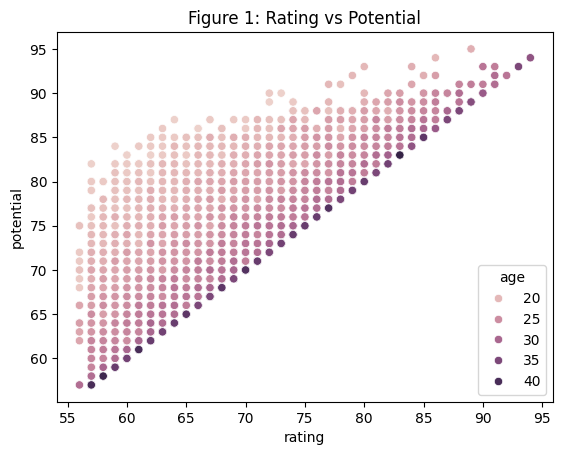

<Figure size 640x480 with 0 Axes>

In [78]:
sns.scatterplot(data=fifa, x='rating', y='potential', hue='age')
plt.title('Figure 1: Rating vs Potential')
plt.show()
plt.clf()

In [53]:
younger = fifa[(fifa['age'] <= 25)]
older = fifa[(fifa['age'] < 45)]
younger_diff = younger['potential'] - younger['rating']
older_diff = older['potential'] - older['rating']
_, p1 = mannwhitneyu(younger_diff, older_diff, alternative='two-sided')
print(f'P-value: {p1:.4f}')

P-value: 0.0000


### Conclusion
##### Looking at Figure 1, it is clear to see that most players with high potential ratings are that of a younger age, with the majority of these players having relatively lower current ratings. On the contrary, older players follow an almost 1-to-1 relationship between their current rating and their potential. These results are to be expected, as a player younger in age has more of his career ahead of him, and a lower rated player has more room to grow and attain a higher rating, and so can become better as time goes on. Older players however have less room for improvement because they could have already hit their peak at a certain age when they were younger, and so do not have much more of their career left to further improve their abilities and therefore increase their rating. These conclusions are further backed up by the P-value of 0.0000 from the performed Mann-Whitney U test, indicating that the difference between current and potential rating is indeed significant between younger and older players.

## Question 2:
### What is the rating distribution and variance among positions?

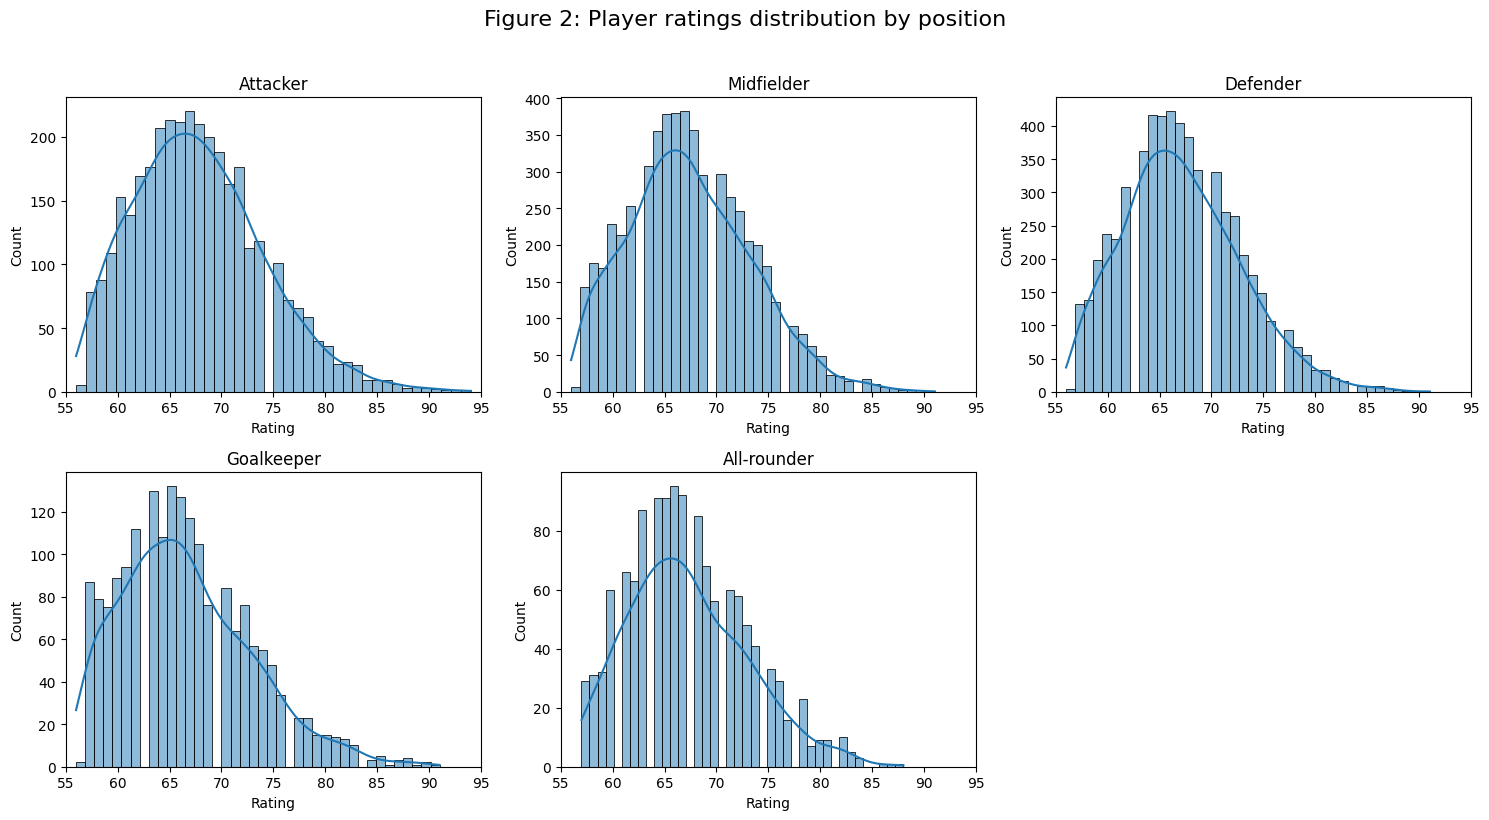

In [79]:
attackers = (fifa[fifa['general_position'] == 'Attacker'])
midfielders = (fifa[fifa['general_position'] == 'Midfielder'])
defenders = (fifa[fifa['general_position'] == 'Defender'])
goalkeepers = (fifa[fifa['general_position'] == 'Goalkeeper'])
all_rounders = (fifa[fifa['general_position'] == 'All-rounder'])

position_labels = ['Attacker', 'Midfielder', 'Defender', 'Goalkeeper', 'All-rounder']
num_positions = len(position_labels)

cols = 3
rows = math.ceil(num_positions / cols)

plt.figure(figsize=(cols * 5, rows * 4))
plt.suptitle('Figure 2: Player ratings distribution by position', y=1.02, fontsize=16)

for i, label in enumerate(position_labels, 1):
    data = fifa[fifa['general_position'] == label]
    plt.subplot(rows, cols, i)
    sns.histplot(data=data, x='rating', bins=40, kde=True)
    plt.title(label)
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.xlim(55, 95)

plt.tight_layout()
plt.show()

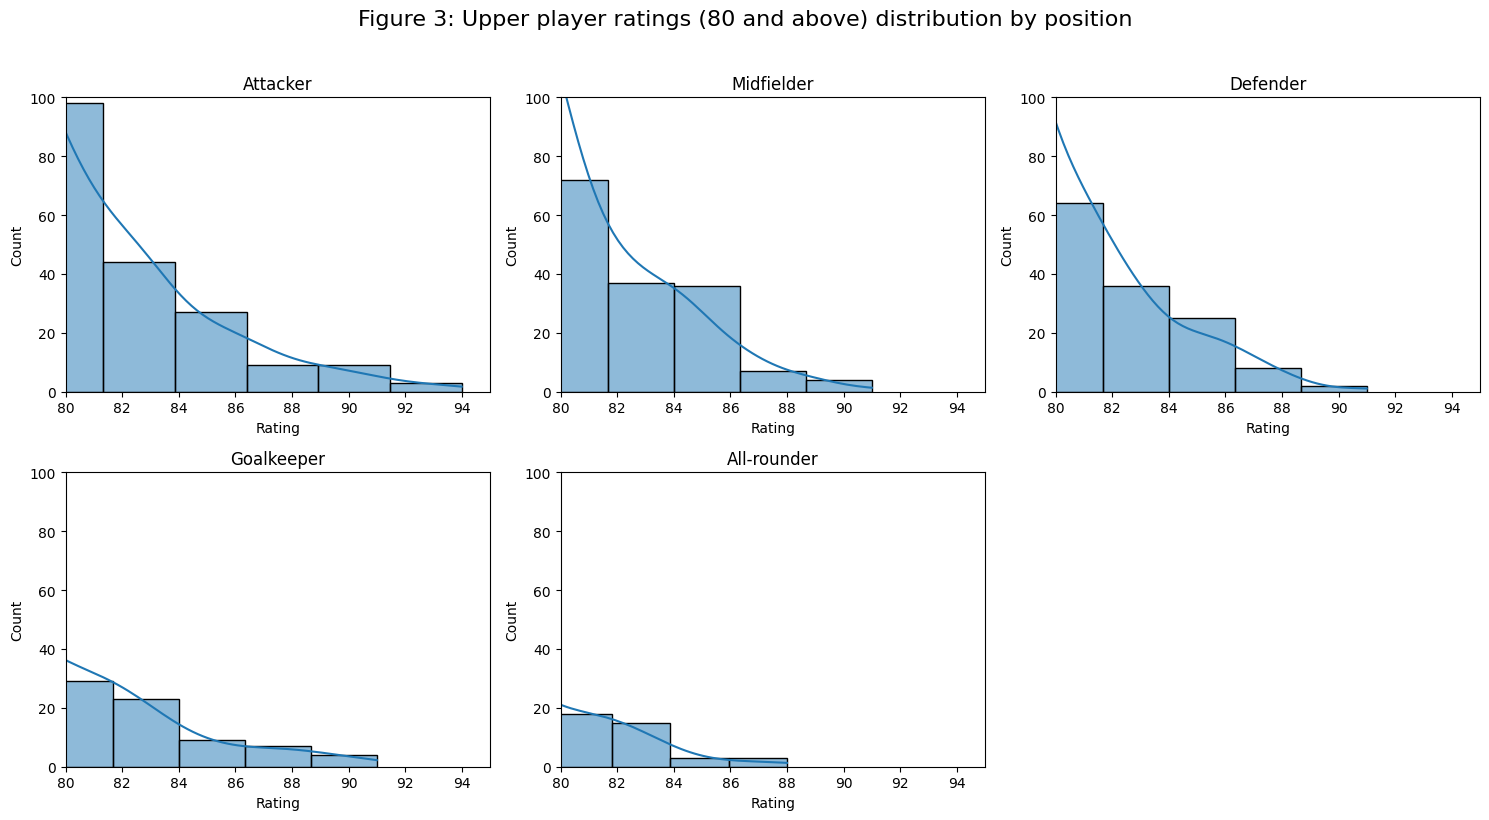

In [55]:
plt.figure(figsize=(cols * 5, rows * 4))
plt.suptitle('Figure 3: Upper player ratings (80 and above) distribution by position', y=1.02, fontsize=16)

for i, label in enumerate(position_labels, 1):
    data = fifa[fifa['general_position'] == label]
    plt.subplot(rows, cols, i)
    sns.histplot(data=data, x='rating', bins=15, kde=True)
    plt.title(label)
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.ylim(0, 100)
    plt.xlim(80, 95)

plt.tight_layout()
plt.show()

In [16]:
position_rating_averages = pd.DataFrame({'general_position': ['Attacker', 'Midfielder', 'Defender', 'Goalkeeper', 'All-rounder'], 
                                         'mean_rating': [attackers['rating'].mean(), midfielders['rating'].mean(), defenders['rating'].mean(), goalkeepers['rating'].mean(), all_rounders['rating'].mean()],
                                         'median_rating': [attackers['rating'].median(), midfielders['rating'].median(), defenders['rating'].median(), goalkeepers['rating'].median(), all_rounders['rating'].median()]})
print('Table 1: Average player ratings by position')
position_rating_averages

Table 1: Average player ratings by position


,general_position,mean_rating,median_rating
0,Attacker,67.774307,67.0
1,Midfielder,67.383129,67.0
2,Defender,67.125428,67.0
3,Goalkeeper,66.565817,66.0
4,All-rounder,67.189231,67.0


In [56]:
top_attackers = (attackers[attackers['rating'] >= 80])
top_midfielders = (midfielders[midfielders['rating'] >= 80])
top_defenders = (defenders[defenders['rating'] >= 80])
top_goalkeepers = (goalkeepers[goalkeepers['rating'] >= 80])
top_all_rounders = (all_rounders[all_rounders['rating'] >= 80])
top_position_rating_averages = pd.DataFrame({'general_position': ['Attacker', 'Midfielder', 'Defender', 'Goalkeeper', 'All-rounder'], 
                                         'mean_rating': [top_attackers['rating'].mean(), top_midfielders['rating'].mean(), top_defenders['rating'].mean(), top_goalkeepers['rating'].mean(), top_all_rounders['rating'].mean()],
                                         'median_rating': [top_attackers['rating'].median(), top_midfielders['rating'].median(), top_defenders['rating'].median(), top_goalkeepers['rating'].median(), top_all_rounders['rating'].median()]})
print('Table 2: Average player ratings by position (top rated players only)')
top_position_rating_averages

Table 2: Average player ratings by position (top rated players only)


,general_position,mean_rating,median_rating
0,Attacker,83.060000,82.0
1,Midfielder,82.371795,82.0
2,Defender,82.400000,82.0
3,Goalkeeper,82.861111,82.0
4,All-rounder,81.974359,82.0


### Conclusion
##### Looking at Figure 2 reveals that there is not a significant amount of variance between the distribution of player ratings for each position, with all plots being right-skewed peaking at around 67 in rating. Interestingly, goalkeepers appear to have a slightly higher proportion of their players at the very lower end, around 60 rated and below, which could indeed bring the overall average down. As it turns out, this is what happens, as shown by Table 1, where goalkeepers have the lowest mean rating, the only one to be below 67, and has a median of 66 rather than 66 like the other positions. The abundance of lower rated goalkeepers could be for a few reasons, such as fewer world-class goalkeepers being available globally, and the fact that many teams and squads only tend to use a single goalkeeper for a whole season, but with backup and youth keepers who rarely play if at all, which can significantly skew the average downwards.

##### Figure 3 however reveals that attackers have the highest proportion of their players rated at 80 and above compared to the other positions. Whilst other positions have some players within this region rated at 90 and then none beyond that, attackers have the most (proportionally) at 90 and some even higher still. This could in turn bring the average rating up for attackers, which is what is seen in both Tables 1 and 2, with attackers having the highest mean rating out of all the positions. The higher proportion of high-rated attackers could be due to the fact that an attacker's skills and talent is often the focus of scouting, media attention, and their performance metric, such as goals, assists, etc. This, paired with clubs tending to invest heavily in strong attacking talent, means that elite performances stand out more and are rated higher, making higher rated attackers more common.

## Question 3:
### What is the age distribution and variance among positions?

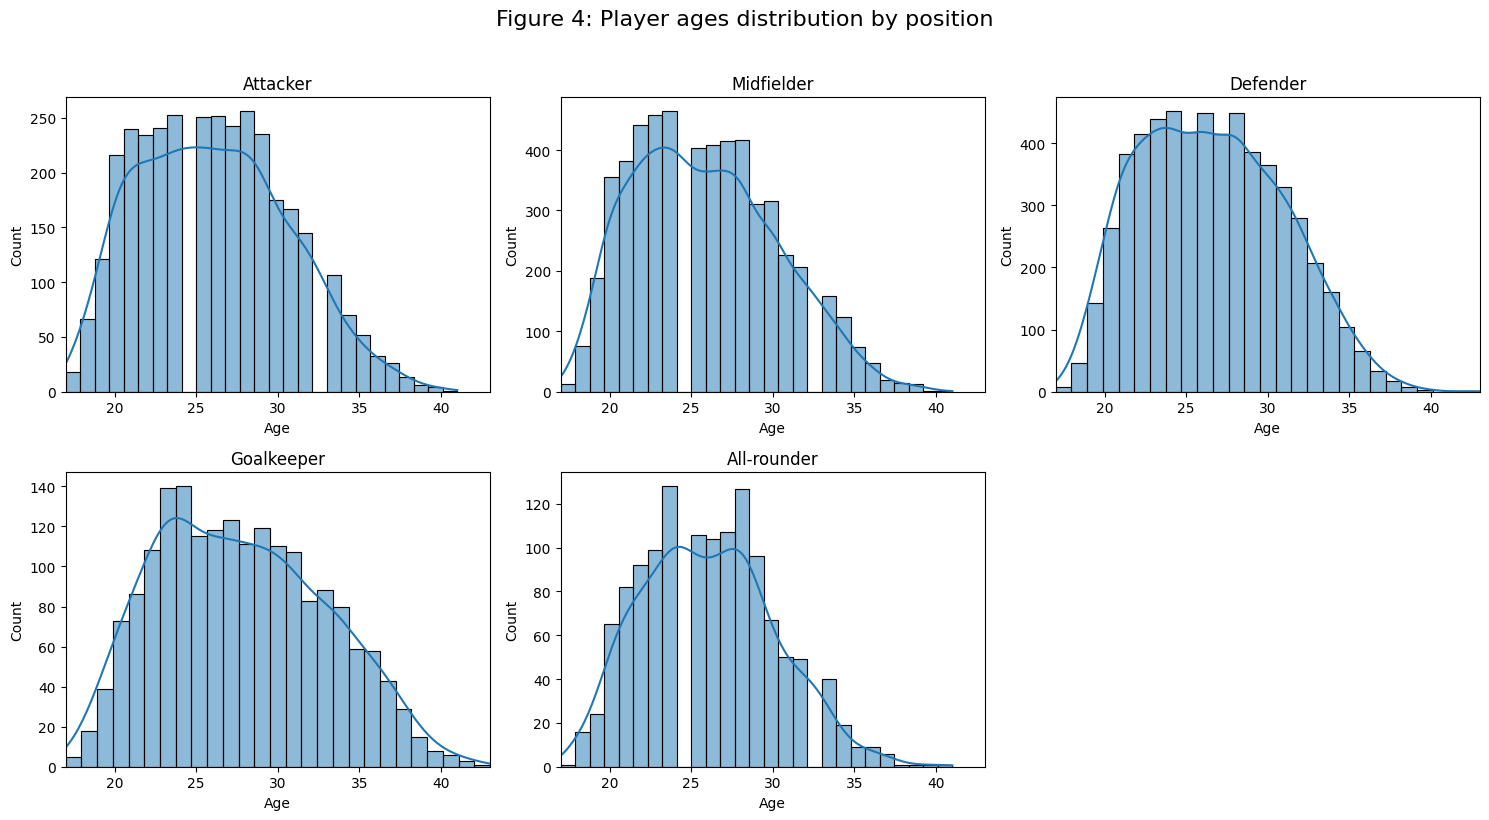

In [57]:
cols = 3
rows = math.ceil(num_positions / cols)

plt.figure(figsize=(cols * 5, rows * 4))
plt.suptitle('Figure 4: Player ages distribution by position', y=1.02, fontsize=16)

for i, label in enumerate(position_labels, 1):
    data = fifa[fifa['general_position'] == label]
    plt.subplot(rows, cols, i)
    sns.histplot(data=data, x='age', bins=27, kde=True)
    plt.title(label)
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.xlim(17, 43)


plt.tight_layout()
plt.show()

In [58]:
age_averages = pd.DataFrame({'general_position': ['Attacker', 'Midfielder', 'Defender', 'Goalkeeper', 'All-rounder'], 
                                         'mean_age': [attackers['age'].mean(), midfielders['age'].mean(), defenders['age'].mean(), goalkeepers['age'].mean(), all_rounders['age'].mean()],
                                         'median_rating': [attackers['age'].median(), midfielders['age'].median(), defenders['age'].median(), goalkeepers['age'].median(), all_rounders['age'].median()]})
print('Table 3: Average player age by position')
age_averages

Table 3: Average player age by position


,general_position,mean_age,median_rating
0,Attacker,26.033285,26.0
1,Midfielder,25.835621,25.0
2,Defender,26.529986,26.0
3,Goalkeeper,27.725584,27.0
4,All-rounder,26.040000,26.0


### Conclusion
##### Unlike with rating, Figure 4 shows that there is more significant variance in distribution of player ages between positions. For example, whilst all positions show an average/peak age of 25, this peak appears to occurs beforehand for midfielders and goalkeepers, the former of which being backed up by Table 3 where midfielders have the lowest mean and median ages of all the positions. 
##### However, looking at Figure 4 once more reveals that goalkeepers have the highest proportion of players aged 30 and above, which is also supported by Table 3 where goalkeepers appear to have the highest mean and median age. This could be due to the unique physical and mental demands of a goalkeepers position on the pitch, where they in theory do not experience as much physical exertion as outfield players, leading to less injuries and long-term exhaustion over time, and so longer playing careers. Goalkeepers also tend to develop a better understanding of football, such as reading plays and effective positioning. For this reason, many clubs choose their main goalkeeper to be their captain, due to the time spent in such a position where they can develop lots of skills and experience that would fit such a role.
##### Figure 4 also shows that attackers and defenders do not have a certain one peak age for that role, but rather a broader spectrum between ages 20-30. In contrast, the focused peak point of midfielders and sharper drop off with age for all-rounders for example suggests that their effectiveness may peak at a more defined point in their careers — likely due to the high physical and tactical demands required in those roles.

## Question 4:
### Do certain positions peak in rating at older ages compared to other positions?

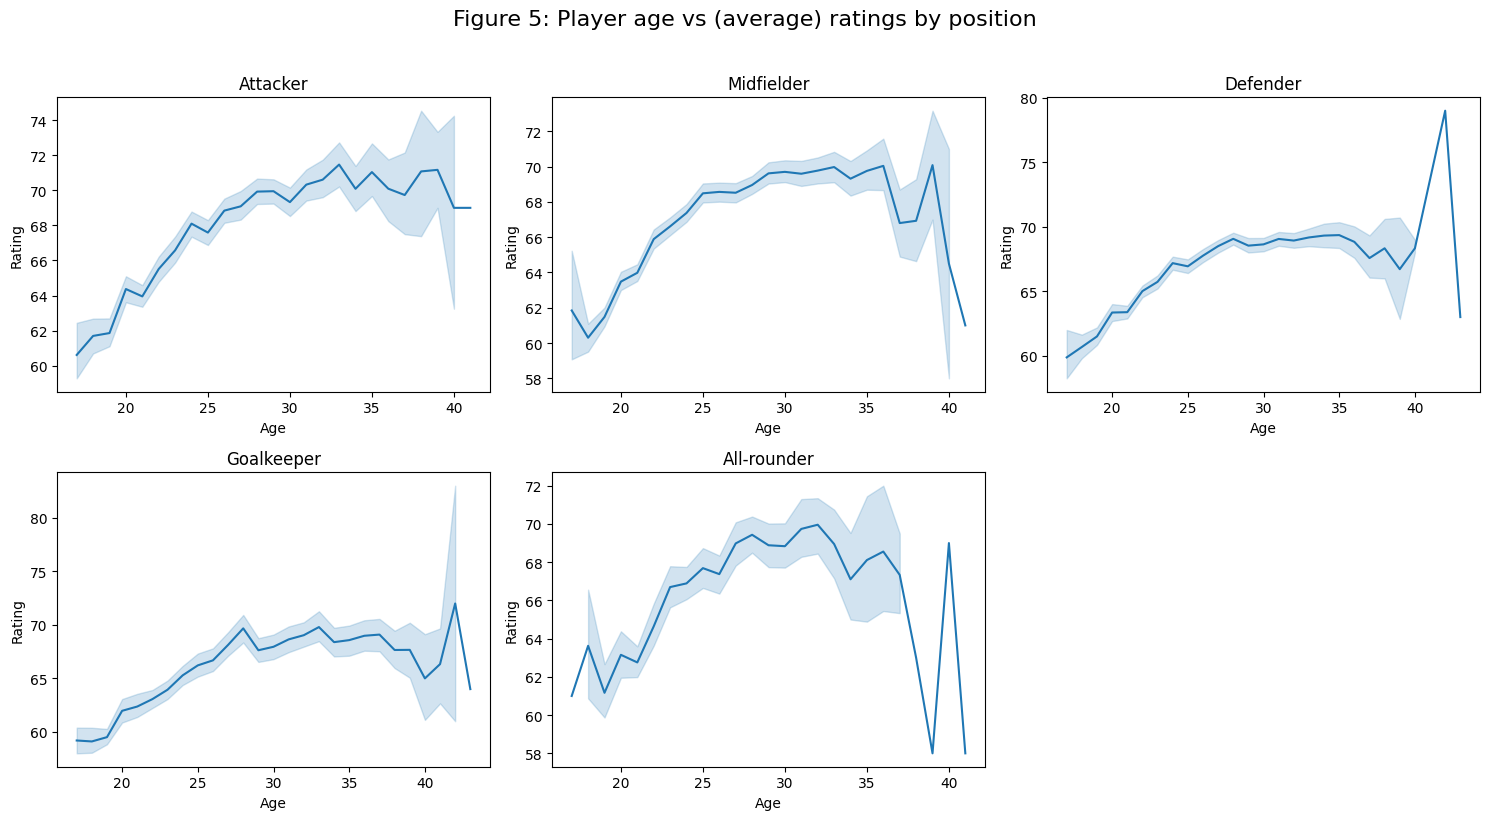

In [77]:
plt.figure(figsize=(cols * 5, rows * 4))
plt.suptitle('Figure 5: Player age vs (average) ratings by position', y=1.02, fontsize=16)

for i, label in enumerate(position_labels, 1):
    data = fifa[fifa['general_position'] == label]
    plt.subplot(rows, cols, i)
    sns.lineplot(data=data, x='age', y='rating')
    plt.title(label)
    plt.xlabel('Age')
    plt.ylabel('Rating')

plt.tight_layout()
plt.show()

### Conclusion
##### Figure 5 shows a similar trend to that of Figure 4, with midfielders and all-rounders have a steeper drop off in rating as they get older, due to potentially being physically burnt out and exhausted earlier on in their careers, whilst attackers, defenders (aside from the one outlier of rating around 79), and goalkeepers have their rating curves level out after about age 30. Unlike goalkeepers and defenders however, attackers average rating do not seem to then go back down again nearly as much after age 35. This could be due to the few highest rated players being attackers (Lionel Messi, Cristiano Ronaldo, Neymar, Robert Lewandowski, etc.) dragging the average up and stopping in from decreasing as much as the other positions.

## Question 5:
### How does the distribution of rating between nationalities differ from that of the distribution of potential of wonderkids (players with high potential at a younger age) between nationalities?

In [61]:
fifa['nationality'].nunique()

162

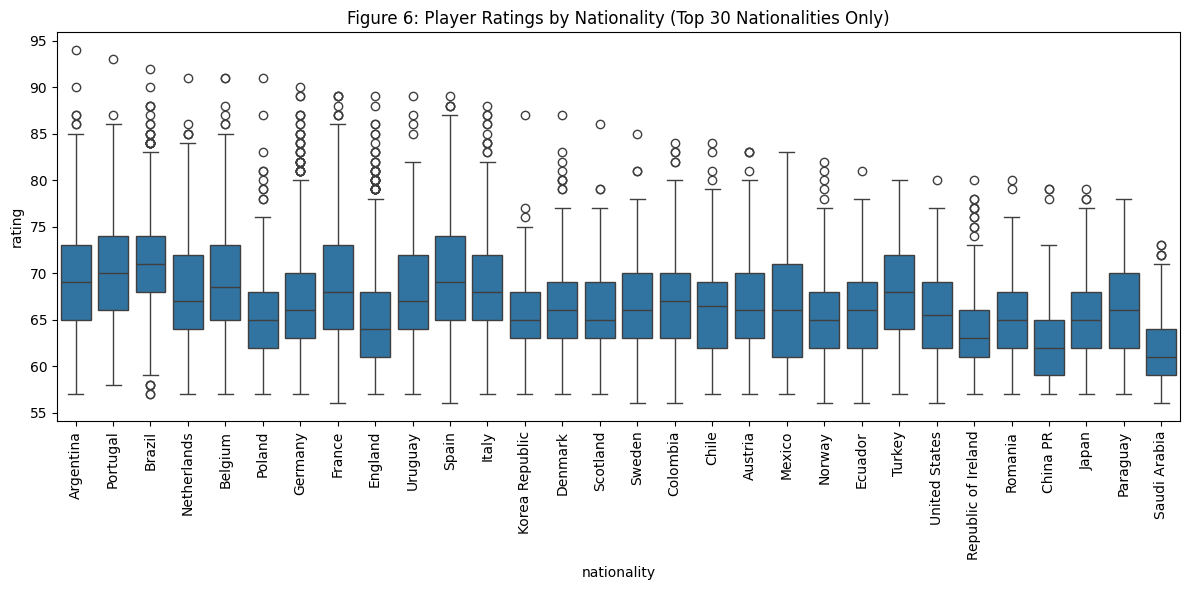

In [64]:
nationality_counts = fifa['nationality'].value_counts()
top_nationalities = nationality_counts[nationality_counts >= 200].index
filtered_fifa = fifa[fifa['nationality'].isin(top_nationalities)]
filtered_fifa['nationality'].unique()
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_fifa, x='nationality', y='rating', showfliers=True)
plt.xticks(rotation=90)
plt.title('Figure 6: Player Ratings by Nationality (Top 30 Nationalities Only)')
plt.tight_layout()
plt.show()

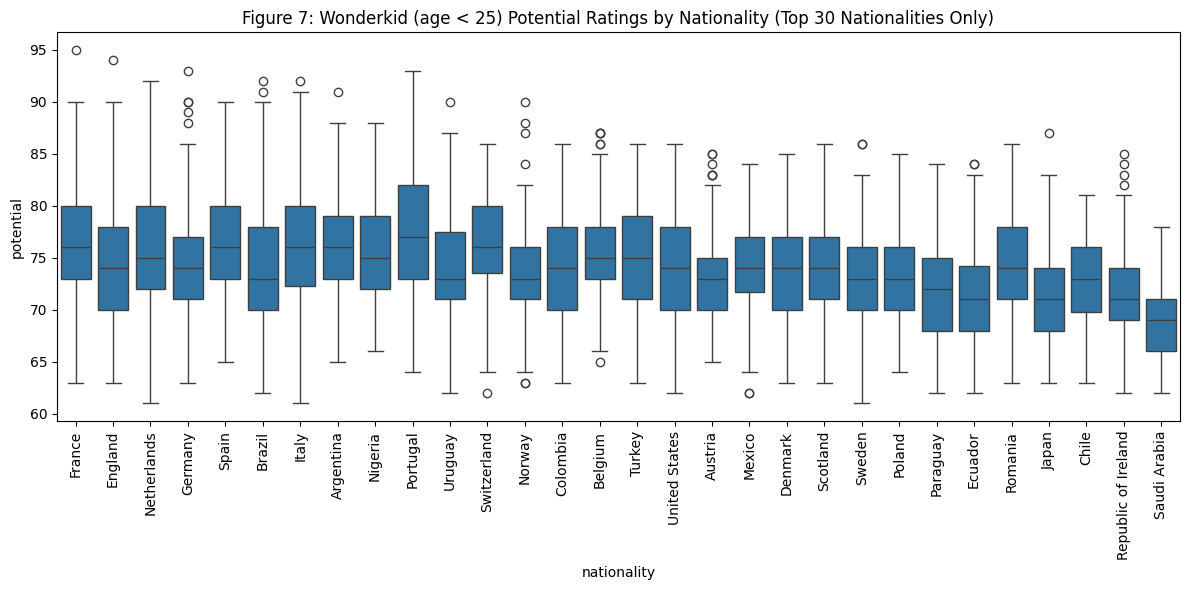

In [65]:
wonderkids = fifa[fifa['age'] < 25]
wonderkids_nationality_counts = wonderkids['nationality'].value_counts()
wonderkids_top_nationalities = wonderkids_nationality_counts[wonderkids_nationality_counts >= 70].index
wonderkids_filtered_fifa = wonderkids[wonderkids['nationality'].isin(wonderkids_top_nationalities)]
wonderkids_filtered_fifa['nationality'].unique()
plt.figure(figsize=(12, 6))
sns.boxplot(data=wonderkids_filtered_fifa, x='nationality', y='potential', showfliers=True)
plt.xticks(rotation=90)
plt.title('Figure 7: Wonderkid (age < 25) Potential Ratings by Nationality (Top 30 Nationalities Only)')
plt.tight_layout()
plt.show()

### Conclusion
##### Figure 6 shows that almost all of the top 30 nationalities have outliers greater that that of their boxplot's upper limits, which supports the conclusions shown by Figure 2 that the vast majority of players are of lower rating even amongst nationalities, with the all nationalities having a median rating between 65-70. Nationalities with the highest rated players in the form of outliers do not necessarily have their maximum-minimum distribution to also be the highest overall. For example, Argentina and Portugal have the two highest rated players, Lionel Messi and Cristiano Ronaldo respectively, would not be considered the top nationalities without those outliers included, as they are below countries such as Spain and France in that regard. Additionally, countries such as Poland and England have a significant amount of higher rated outliers dragging them up the ranks, but medians lower than most. This indicates that the vast majority of players from these nationalities are lower rated players between 60-70, but have a select few high rated players that skew their distribution.
##### Figure 7 reveals that countries with higher rated players do not necessarily have younger players with high potential. For example, the median potential of England's young players is around 75, compared to their current rating of around 65. Additionally, their maximum extends to 90, as opposed to 80 shown in Figure 6. There are also some nationalities present in Figure 7 not in Figure 6, such as Nigeria and Switzerland. All this indicates that these countries have strong and promising youth talent compared to that of their older current players. On the contrary, countries such as Argentina and Portugal, which possess some of the highest rated current players, are significantly lower down in the ranking for their wonderkids, indicating that their current more experienced players are rated higher than their younger players potentially.
##### Overall, these findings reveal that countries such as England and France invest more in youth academies and talent scouting, as indicated bu the higher potentials among younger players. Additionally, nations like Portugal and Argentina may have produced generational icons in the past, they may now be experiencing something of a transitional phase, where the next generation of footballers have not yet reached these heights as of yet.

# Overall Conclusion
#### Analysis shows that younger players tend to have higher potential ratings compared to their current form, whilst older players have generally already hit their peak. Across positions, player rating distribution are similar in shape but differ in the finer details - goalkeeper ratings are dragged down by the surplus of lower rated backups kept by clubs, whilst attackers dominate the higher rated players, likely due to how easily their performances standout and impact the game as a whole. Age seems to also play a significant role in a player's rating, with midfielders and all-round player types typically peaking earlier on in their career, whilst goalkeepers maintain their form into their 30s more than the other positions. Nationality-based analysis shows that countries such as Argentina and Portugal rely significantly on high rated standout individuals, whislt nations like England and France demonstrate stronger youth potential.
#### Overall, whilst it's clear that factors such as age, position, and national infrastructure can impact a player's rating and potential, it's important to note that other factors not considered might play their part in shaping a player's ability. For example, going in-depth to a player's abilities, such as their specific shooting and playmaking skills, or whether or not a player is the captain of their team/country, could very well be significant factors in a their rating and potential.